In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

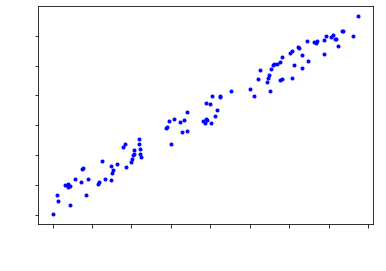

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 20, color = 'w')
plt.xticks(color='w')
plt.ylabel('$y$', fontsize = 20, color = "w", rotation = 0)
plt.yticks(color='w')
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

minimize MSE: 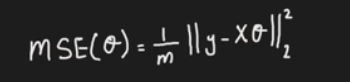

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.48660105],
       [3.06560175]])

In [7]:
X_new = np.array([[0], [2]])

In [8]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [9]:
y_pred = X_new_b.dot(theta_best)

In [10]:
y_pred

array([[ 4.48660105],
       [10.61780456]])

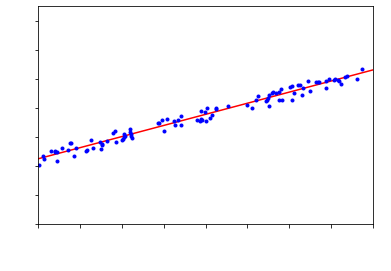

In [11]:
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 20, color = 'w')
plt.xticks(color='w')
plt.ylabel('$y$', fontsize = 20, color = "w", rotation = 0)
plt.yticks(color='w')
plt.axis((0, 2, 0, 15))
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X, y)
l_reg.intercept_, l_reg.coef_

/home/ines/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(array([4.48660105]), array([[3.06560175]]))

In [13]:
l_reg.predict(X_new)

array([[ 4.48660105],
       [10.61780456]])

# BGD

compute gradient on full training set

In [14]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.48660105],
       [3.06560175]])

In [16]:
X_new_b.dot(theta)

array([[ 4.48660105],
       [10.61780456]])

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None, epsilon = 0):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        if(np.linalg.norm(eta*gradients) < epsilon):
            break
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    print(str(iteration+1) + " iterations")
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

18 iterations
107 iterations
1000 iterations


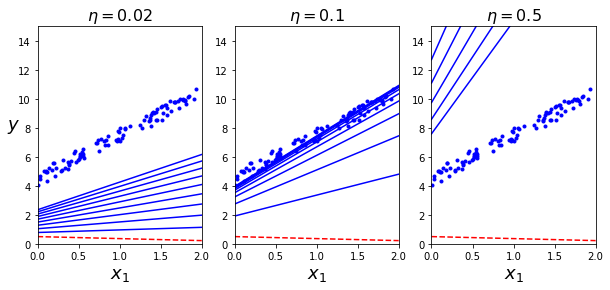

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02, epsilon = .1)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd, epsilon = .001)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# SGD

numerical optimization method. compute gradient on one instance: m = 1

[[4.50380077]
 [3.07133202]]


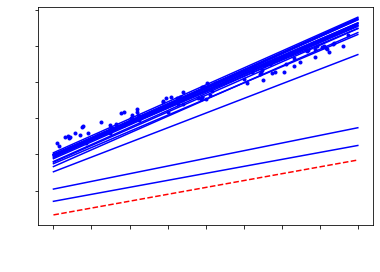

In [19]:
theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initializationfor epoch in range(n_epochs):
for epoch in range(n_epochs):
    for i in range(m):# getting a random instance  
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]# calulating gradient on single instance        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)# getting learning rate         
        eta = learning_schedule(epoch * m + i)# updating theta        
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
print(theta)
# array([[4.21076011],
#       [2.74856079]])
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 20, color = 'w')
plt.xticks(color='w')
plt.ylabel('$y$', fontsize = 20, color = "w", rotation = 0)
plt.yticks(color='w')
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor
#eta0 is starting pnt, penaltyno regulization
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.47028948]), array([3.09822041]))

# mini_BGD

compute gradient on small random sets of instances called mini-batches

In [22]:
#save path to animate the plot
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(60)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0/(t+t1)
t = 0

for epoch in range(n_iterations):
    shuff_indices = np.random.permutation(m)
    X_b_shuff = X_b[shuff_indices]
    y_shuff = y[shuff_indices]
    for i in range(0, m, minibatch_size):
        t = t + 1
        xi = X_b[i:i+minibatch_size]
        yi = y[i:i+minibatch_size]
        gradients = (2/minibatch_size) * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.46247595],
       [3.04334689]])

In [24]:
theta_path_mgd = np.array(theta_path_mgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_bgd = np.array(theta_path_bgd)

<IPython.core.display.Javascript object>


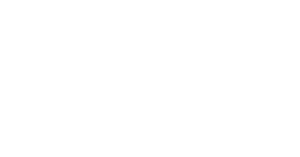

Text(0, 0.5, '$\\theta_1$')

In [25]:
%matplotlib notebook
import matplotlib.animation as animation

xx = theta_path_mgd[:, 0]
yy = theta_path_mgd[:, 1]

fig, ax = plt.subplots()
l = plt.plot(xx, yy, 'g-+', linewidth = 1, label = 'mgd')
redDot, = plt.plot([xx[0]], [yy[0]], 'ro')

def animate(i):
    redDot.set_data(xx[i], yy[i])
    return redDot,
myAnimation = animation.FuncAnimation(fig, animate, interval = 50, frames = 60, blit = True)
plt.xlabel(r'$\theta_0$', fontsize = 18)
plt.ylabel(r'$\theta_1$', fontsize = 18)

<IPython.core.display.Javascript object>


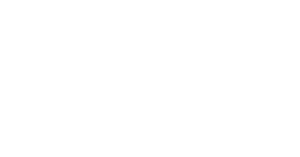

/home/ines/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Text(0, 0.5, '$\\theta_1$')

In [26]:
%matplotlib notebook
import matplotlib.animation as animation

xx = theta_path_sgd[:, 0]
yy = theta_path_sgd[:, 1]

fig, ax = plt.subplots()
l = plt.plot(xx, yy, 'g-+', linewidth = 1, label = 'sgd')
redDot, = plt.plot([xx[0]], [yy[0]], 'ro')

def animate2(i):
    redDot.set_data(xx[i], yy[i])
    return redDot,
myAnimation = animation.FuncAnimation(fig, animate2, interval = 50, frames = 60, blit = True)
plt.xlabel(r'$\theta_0$', fontsize = 18)
plt.ylabel(r'$\theta_1$', fontsize = 18)

<IPython.core.display.Javascript object>


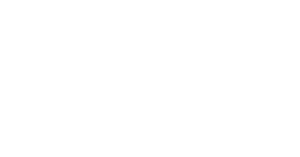

/home/ines/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Text(0, 0.5, '$\\theta_1$')

In [27]:
%matplotlib notebook
import matplotlib.animation as animation

xx = theta_path_bgd[:, 0]
yy = theta_path_bgd[:, 1]

fig, ax = plt.subplots()
l = plt.plot(xx, yy, 'g-+', linewidth = 1, label = 'bgd')
redDot, = plt.plot([xx[0]], [yy[0]], 'ro')

def animate3(i):
    redDot.set_data(xx[i], yy[i])
    return redDot,
myAnimation = animation.FuncAnimation(fig, animate3, interval = 50, frames = 60, blit = True)
plt.xlabel(r'$\theta_0$', fontsize = 18)
plt.ylabel(r'$\theta_1$', fontsize = 18)

# Poly

In [28]:
m = 100
X_ = 6*np.random.rand(m, 1) - 3
y_ = .5*X_**2 + X_ + 2 + np.random.randn(m, 1)

<IPython.core.display.Javascript object>


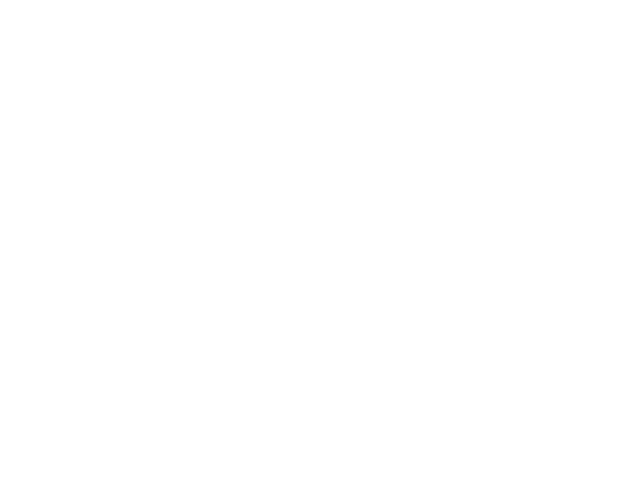

In [29]:
%matplotlib notebook
plt.plot(X_, y_, 'b.')
plt.xlabel(r'$x_1$', fontsize = 10)
plt.ylabel(r'$y$', fontsize = 10, rotation = 0)
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X_)

In [31]:
X_[1]

array([-1.05577436])

In [32]:
X_poly[1]

array([-1.05577436,  1.1146595 ])

In [33]:
l_reg_poly = l_reg.fit(X_poly, y_)
l_reg_poly

LinearRegression()

In [34]:
l_reg_poly.intercept_, l_reg_poly.coef_

(array([2.10776744]), array([[1.02124901, 0.50198343]]))

<IPython.core.display.Javascript object>


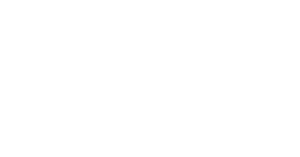

In [35]:
%matplotlib notebook
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = l_reg_poly.predict(X_new_poly)
plt.plot(X_, y_, 'b.', label = 'Dataset')
plt.plot(X_new, y_new, 'r-', label = 'Pred')
plt.xlabel(r'$x_1$', fontsize = 10)
plt.ylabel(r'$y$', fontsize = 10, rotation = 0)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


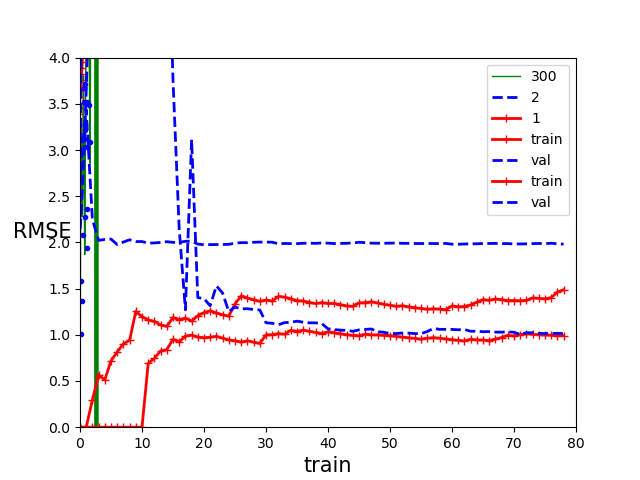

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib notebook
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ('r-+', 2, 1)):
    polybig = PolynomialFeatures(degree = degree, include_bias = False)
    scaler = StandardScaler()
    poly_reg = Pipeline([
        ('poly', polybig),
        ('scaler', scaler),
        ('l_reg', l_reg),
    ])
    
    poly_reg.fit(X_, y_)
    y_newbig = poly_reg.predict(X_new)
    plt.plot(X_new, y_newbig, style, label = str(degree), linewidth = width)

plt.plot(X_, y_, 'b.', linewidth = 4)
plt.legend()
plt.xlabel('$x_1$', fontsize = 10)
plt.ylabel('$y$', fontsize = 10, rotation = 0)
plt.axis((-3, 3, 0, 10))
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X_, y_):
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size = .2)
    train_err, val_err = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_err.append(mean_squared_error(y_train[:m], y_train_pred))
        val_err.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_err), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_err), 'b--', linewidth = 2, label = 'val')
    plt.legend()
    plt.xlabel('train', fontsize = 15)
    plt.ylabel('RMSE', fontsize = 15)

In [38]:
plot_learning_curves(l_reg, X_, y_)

In [39]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree = 10, include_bias = False)),
    ('l_reg', LinearRegression())
])

plot_learning_curves(poly_reg, X_, y_)
plt.axis([0, 80, 0, 4])
plt.show()

reduce overfitting by regulization (fewer degree of freedom) -> reduce n of poly degrees and constrain w of model

all three regulizational regs penalize w in theta 

# Ridge reg

regulized version of linear reg. Minimize MSE + penalty: 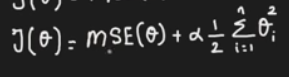

where alpha is the hyperpermeter, controls magnitude of theta. if alpha is high: MSE cant be minimized. if low, back to linear reg (LS).

alpha and theta move in opposites. theta stats at 1 bc theta 0 is a bias term

Ridge = 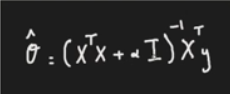

In [40]:
from sklearn.linear_model import Ridge

np.random.seed(42)

m = 20 #samples
X = 3*np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m, 1)/1.5

X_new = np.linspace(0, 3, 100).reshape(100, 1)

<IPython.core.display.Javascript object>


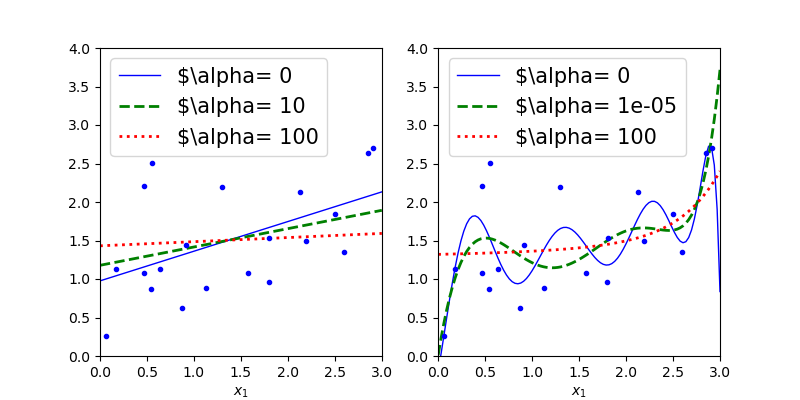

In [41]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", 'r:')):
        #instantiate reg
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly', PolynomialFeatures(degree = 10, include_bias = False)),
                ('scaler', StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label = r'$\alpha= {}'.format(alpha))
    plt.plot(X, y, 'b.', linewidth = 3)
    plt.legend(fontsize=15)
    plt.xlabel("$x_1$")
    plt.axis([0,3, 0,4])

plt.figure(figsize=(8,4))
plt.subplot(121);
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100), random_state = 42)
plt.subplot(122);
plot_model(Ridge, polynomial = True,alphas = (0,10**-5,100), random_state=42)
plt.show()

In [42]:
ridge_reg = Ridge(alpha = 1, solver = 'cholesky', random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [43]:
ridge_reg.intercept_

array([1.00650911])

In [44]:
ridge_reg.coef_

array([[0.36280369]])

In [45]:
print('theta 0 = ' + str(ridge_reg.intercept_))
print('theta 1 = ' + str(ridge_reg.coef_))

theta 0 = [1.00650911]
theta 1 = [[0.36280369]]


In [46]:
sgd_reg = SGDRegressor(max_iter = 50, tol = -np.infty, penalty = 'l2', random_state = 42)
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/home/ines/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.49905184])

In [47]:
#max_iter increase, value converges to ridge reg

# LASSO reg

cost function: 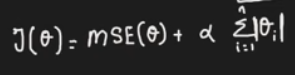

diff: sets least important features to 0

In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X, y)
lasso.predict([[1.5]])

array([1.53788174])

<IPython.core.display.Javascript object>


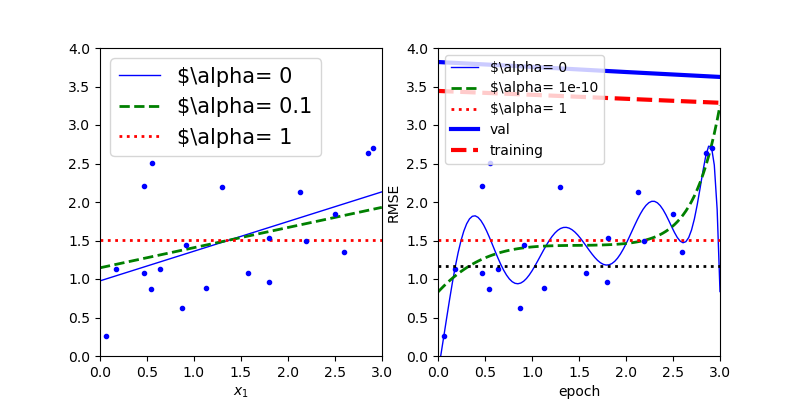

/home/ines/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


In [49]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = (0, .1, 1), random_state = 42)
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas = (0,10**-10, 1), random_state = 42)

In [50]:
#lasso automatically performs feature selection and outputs a sparse model(few non-sero feature w)

gradient of the penalty is not defined in sgd. we use sub-gradient of penalty. abs value is not differenciable everywhere

gradient of g of theta = 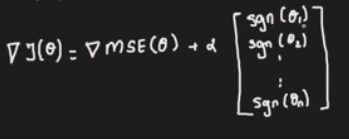

# elastic net reg

mix of 2 prev regs.

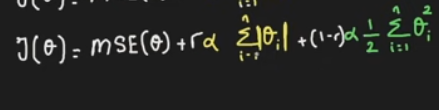

pref over lasso when the features are corr or n features > training instances

In [51]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = .1, l1_ratio = .5, random_state = 42)
elastic.fit(X, y)
elastic.predict([[1.5]])

array([1.54333232])

# Early stopping

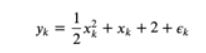

In [52]:
np.random.seed(42)
m = 100
X= 6* np.random.rand(m, 1) - 3
y = 2 + X + .5 * X** 2 + np.random.randn(m, 1)

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [54]:
poly_scaler = Pipeline([
    ('poly', PolynomialFeatures(degree = 90, include_bias= False)),
    ("scaler", StandardScaler())
])

In [55]:
X_train_poly_s = poly_scaler.fit_transform(X_train)
X_val_poly_s = poly_scaler.transform(X_val)

In [56]:
#learning based on sgd
#max_iter = 1 -> early stopping
#warm_start: using prev computed values to initialize

sgd_reg = SGDRegressor(max_iter = 1,
                      tol = -np.infty,
                      penalty = None,
                      eta0 = .0005,
                      warm_start = True,
                      learning_rate = 'constant',
                      random_state = 42)

In [57]:
train_err = []
val_err = []
for epoch in range(500):
    sgd_reg.fit(X_train_poly_s, y_train)
    y_train_pred = sgd_reg.predict(X_train_poly_s)
    y_val_pred = sgd_reg.predict(X_val_poly_s)
    train_err.append(mean_squared_error(y_train, y_train_pred))
    val_err.append(mean_squared_error(y_val, y_val_pred))

In [58]:
#position of epoch where MSE is min
best_epoch = np.argmin(val_err)
best_val_epoch = np.sqrt(val_err[best_epoch])

In [59]:
best_epoch

239

In [60]:
plt.annotate('best model', xy =(best_epoch, best_val_epoch), xytext = (best_epoch, best_val_epoch+1), 
             ha = 'center', arrowprops=dict(facecolor = 'black', shrink = .05))

plt.plot([0, 500], [best_val_epoch, best_val_epoch], "k:", linewidth = 2)
plt.plot(np.sqrt(val_err), 'b-', linewidth = 3, label = "val")
plt.plot(np.sqrt(train_err), 'r--', linewidth = 3, label = "training")
plt.legend()
plt.xlabel("epoch")
plt.ylabel('RMSE')
plt.show()

# Log reg

In [61]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [62]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

/tmp/ipykernel_16437/2877987205.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int)


In [63]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver = 'liblinear', random_state = 42)
log.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

<IPython.core.display.Javascript object>


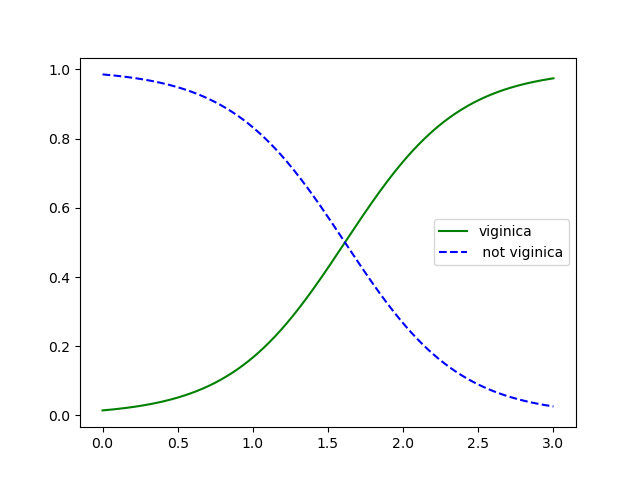

In [64]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log.predict_proba(X_new)

plt.figure()
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'viginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = ' not viginica')
plt.legend()

<IPython.core.display.Javascript object>


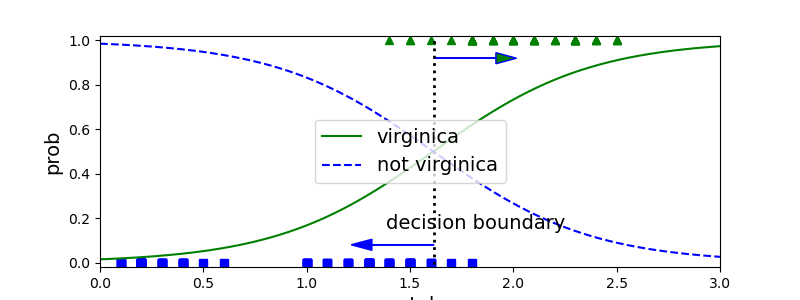

/home/ines/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


In [65]:
#model estimated prob

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= .5][0]

plt.figure(figsize = (8,3))
plt.plot(X[y==0], y[y == 0], 'bs')
plt.plot(X[y==1], y[y == 1], 'g^')
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth = 2)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'not virginica')
plt.text(decision_boundary + .2, .15, 'decision boundary', fontsize = 14, color = 'k', ha= 'center')
plt.arrow(decision_boundary, .08, -.3, 0, head_width = .05, head_length = .1, fc = 'b', ec = 'b') 
plt.arrow(decision_boundary, .92, .3, 0, head_width = .05, head_length = .1, fc = 'g', ec = 'b')
plt.xlabel('petal', fontsize = 14)
plt.ylabel("prob", fontsize = 14)
plt.legend(loc = 'center', fontsize = 14)
plt.axis([0, 3, -.02, 1.02])
plt.show()

In [66]:
log.predict([[1.7], [1.5]])

array([1, 0])

In [67]:
decision_boundary

array([1.61561562])

In [68]:
X = iris['data'][:, (2, 3)] #petal length and width
y = (iris['target'] == 2).astype(np.int) #1 if virginica

/tmp/ipykernel_16437/16089601.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int) #1 if virginica


In [69]:
log = LogisticRegression(solver = 'liblinear', C = 10 ** 10,random_state = 42)
log.fit(X, y)

LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

In [70]:
x0, x1 = np.meshgrid(
            np.linspace(2.9, 7, 500).reshape(-1, 1),
            np.linspace(.8, 2.7, 200).reshape(-1, 1))

In [71]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [72]:
y_proba = log.predict_proba(X_new)

<IPython.core.display.Javascript object>


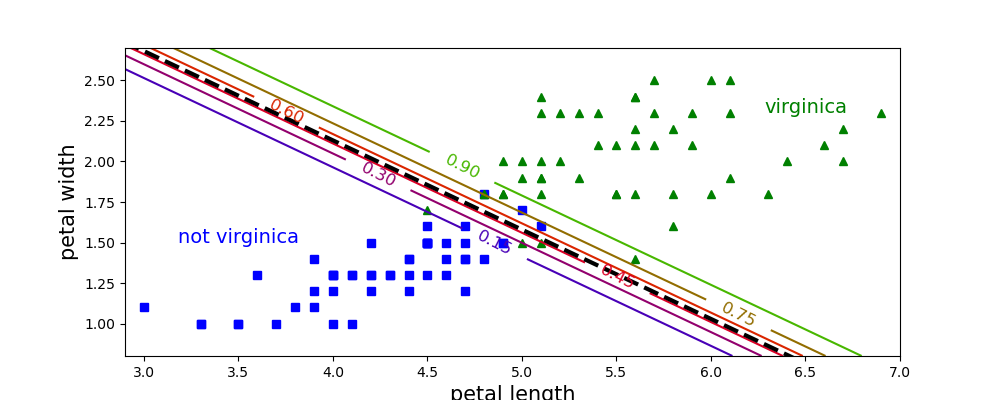

In [74]:
plt.figure(figsize=(10,4))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)

lr = np.array([2.9, 7])
boundary = -(log.coef_[0][0] * lr + log.intercept_[0])/log.coef_[0][1]

plt.clabel(contour, inline = 1, fontsize = 12)
plt.plot(lr, boundary,'k--', linewidth = 3)
plt.text(3.5, 1.5, 'not virginica', fontsize = 14, color = 'b', ha = 'center')
plt.text(6.5, 2.3, 'virginica', fontsize = 14, color = 'g', ha = 'center')
plt.axis([2.9, 7, .8, 2.7])
plt.xlabel('petal length', fontsize = 15)
plt.ylabel('petal width', fontsize = 15)
plt.show()

# SoftMax reg

In [75]:
X = iris['data'][:, (2, 3)] #petal length and width
y = iris['target']

In [76]:
softmax = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10, random_state = 10)
softmax.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=10)

In [77]:
x0, x1 = np.meshgrid(
            np.linspace(0, 8, 500).reshape(-1, 1),
            np.linspace(0, 3.5, 200).reshape(-1, 1))

In [78]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax.predict_proba(X_new)
y_pred = softmax.predict(X_new)

In [79]:
zzl = y_proba[:, 1].reshape(x0.shape)
zz = y_pred.reshape(x0.shape)

<IPython.core.display.Javascript object>


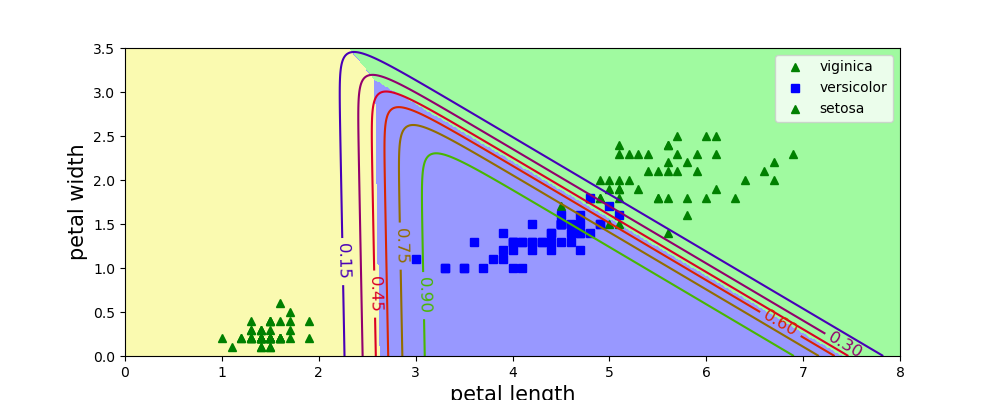

In [81]:
plt.figure(figsize=(10,4))
plt.plot(X[y==2,0], X[y==2, 1], 'g^', label = 'viginica')
plt.plot(X[y==1,0], X[y==1, 1], 'bs', label = 'versicolor')
plt.plot(X[y==0,0], X[y==0, 1], 'g^', label = 'setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', "#9898ff", "#a0faa0"])

plt.contourf(x0, x1, zz, cmap = custom_cmap)
contour = plt.contour(x0, x1, zzl, cmap = plt.cm.brg)
plt.clabel(contour, inline = 1, fontsize = 12)
plt.xlabel("petal length", fontsize = 15)
plt.ylabel("petal width", fontsize = 15)
plt.legend()
plt.show()